In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Xem qua dữ liệu để tìm phương hướng xử lý

In [4]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/INT3401E24_Nhom3_ClassificationModel/cleaned_train.csv')
train_df.head(5)

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0.239997,-0.072420,0.0,0.0,-1.745279,0.0,1.0,-0.731539,0.8,0.2,...,0.6,1.0,1.0,0.8,0.6,0.8,0.8,1.0,1.0,0.0
1,-0.423496,-0.072420,0.0,1.0,-0.951360,1.0,2.0,-0.957184,0.4,0.6,...,0.6,0.2,0.2,0.2,1.0,0.6,0.2,0.8,0.2,0.0
2,-0.551789,0.210236,1.0,0.0,-0.885200,1.0,2.0,-0.047584,0.4,0.4,...,1.0,1.0,1.0,0.8,0.6,0.8,0.8,0.8,1.0,1.0
3,-0.183640,-0.229181,1.0,0.0,-0.951360,1.0,2.0,-0.629246,1.0,1.0,...,0.4,0.4,0.4,0.4,1.0,0.6,0.2,0.8,0.4,0.0
4,-0.551789,-0.072420,0.0,0.0,1.430397,1.0,2.0,-0.978244,0.6,0.6,...,1.0,1.0,0.6,0.6,0.8,0.8,0.6,0.6,0.6,1.0


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pca_f1,103904.0,7.235512e-17,1.400421,-0.551789,-0.551789,-0.514797,-0.109853,57.879930
pca_f0,103904.0,-6.261299e-17,0.357398,-0.637731,-0.355075,-0.072420,0.210236,0.775547
Gender,103904.0,5.074588e-01,0.499947,0.000000,0.000000,1.000000,1.000000,1.000000
Customer Type,103904.0,1.826782e-01,0.386404,0.000000,0.000000,0.000000,0.000000,1.000000
Age,103904.0,-2.728966e-15,1.000005,-2.142239,-0.819040,0.041039,0.768798,3.018235
Type of Travel,103904.0,6.896270e-01,0.462649,0.000000,0.000000,1.000000,1.000000,1.000000
Class,103904.0,1.028103e+00,0.962858,0.000000,0.000000,1.000000,2.000000,2.000000
Flight Distance,103904.0,1.067568e-16,1.000005,-1.161768,-0.777671,-0.347441,0.555138,3.804423
Departure/Arrival time convenient,103904.0,6.120592e-01,0.305015,0.000000,0.400000,0.600000,0.800000,1.000000
Gate location,103904.0,5.953765e-01,0.255524,0.000000,0.400000,0.600000,0.800000,1.000000


# Vẽ biểu đồ tần số của các thuộc tính dạng số

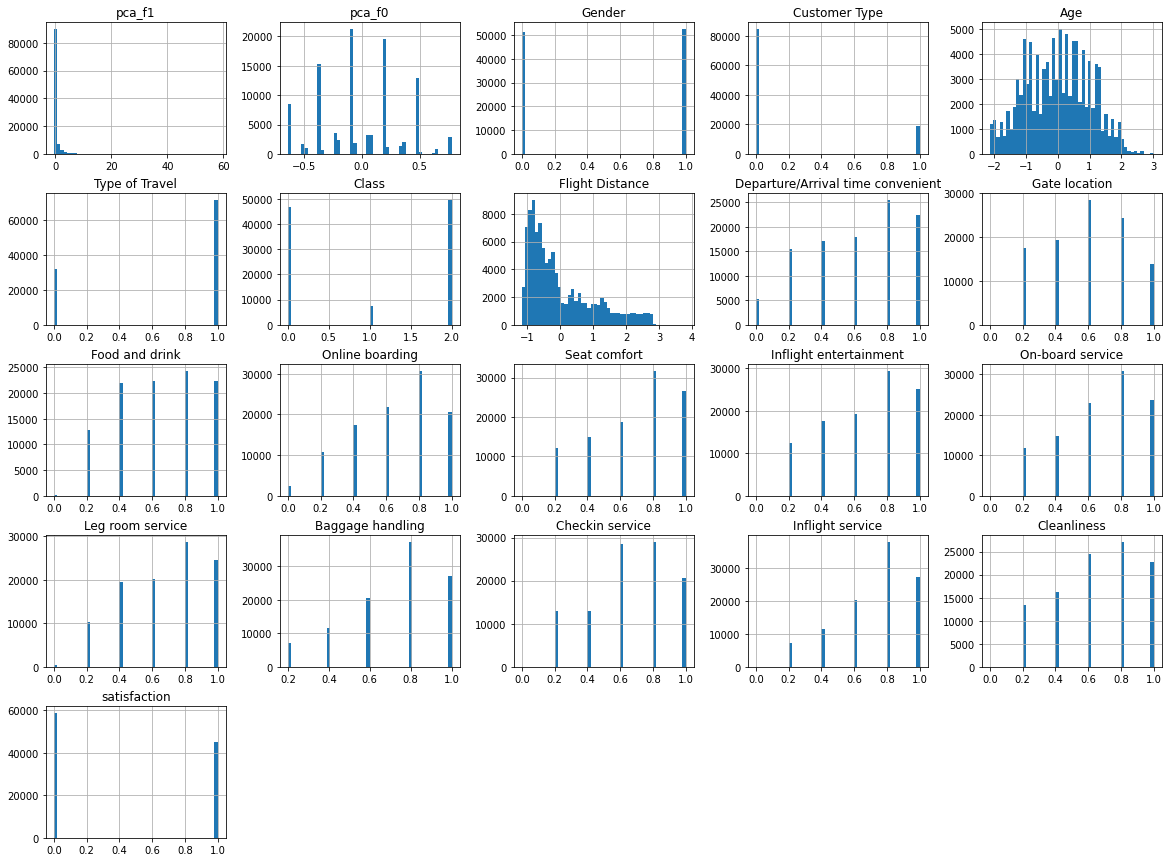

In [6]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Tiếp tục làm tương tự trên tập test để xét yếu tố cân bằng giữa 2 tập train-test

In [7]:
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/INT3401E24_Nhom3_ClassificationModel/cleaned_test.csv')
test_df.head(5)

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1.226797,-0.344492,1.0,0.0,0.817887,1.0,0.0,-1.035171,0.8,0.8,...,0.8,0.6,1.0,1.0,1.0,1.0,0.4,1.0,1.0,1.0
1,-0.548594,0.198319,1.0,0.0,-0.239238,1.0,2.0,1.671443,0.2,0.2,...,0.8,1.0,0.8,0.8,0.8,0.8,0.6,0.8,1.0,1.0
2,-0.548594,0.209534,0.0,1.0,-1.296363,1.0,0.0,-1.003128,0.0,0.8,...,0.4,0.4,0.4,0.8,0.2,0.6,0.4,0.4,0.4,0.0
3,-0.435326,0.774774,0.0,0.0,0.289325,1.0,2.0,2.186131,0.0,0.4,...,0.8,0.8,0.2,0.2,0.2,0.2,0.6,0.2,0.8,1.0
4,-0.171036,-0.084302,1.0,0.0,0.619676,1.0,0.0,-0.011804,0.6,0.6,...,0.2,0.4,0.4,0.4,0.4,0.4,0.8,0.4,0.8,1.0


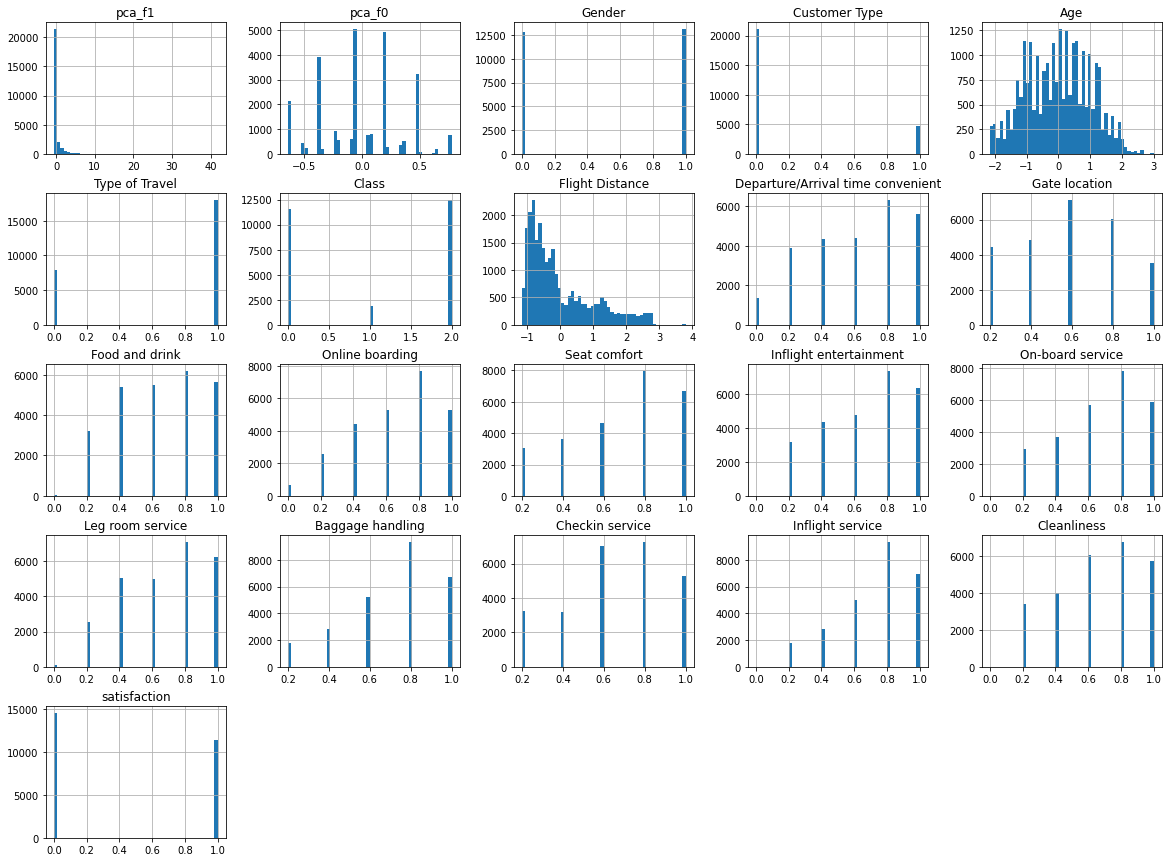

In [8]:
test_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
test_df.shape

(25976, 21)

# Xét yếu tố tương quan của các thuộc tính so với nhau và với nhãn 

In [10]:
train_corr = train_df.corr()
train_corr

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
pca_f1,1.000000,0.013469,-0.001681,0.004432,-0.011250,0.005608,-0.011760,-0.000134,0.000072,0.005354,...,-0.020650,-0.029159,-0.029360,-0.033700,0.013222,-0.007121,-0.019587,-0.057520,-0.015068,-0.054528
pca_f0,0.013469,1.000000,0.008526,0.015001,-0.023279,-0.129714,-0.079352,-0.041285,-0.424491,-0.433085,...,-0.462873,-0.079267,-0.132872,-0.083738,-0.142883,-0.083405,-0.028206,-0.076101,-0.076415,-0.242258
Gender,-0.001681,0.008526,1.000000,0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.009142,-0.000333,...,0.042260,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.012211
Customer Type,0.004432,0.015001,0.031732,1.000000,-0.281674,0.308333,-0.105735,-0.225200,-0.206869,0.006078,...,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,-0.187638
Age,-0.011250,-0.023279,-0.008928,-0.281674,1.000000,0.048524,0.140565,0.099461,0.038125,-0.001330,...,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,0.137167
Type of Travel,0.005608,-0.129714,0.006909,0.308333,0.048524,1.000000,0.545257,0.267344,-0.259763,0.030700,...,0.224803,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.449000
Class,-0.011760,-0.079352,-0.008253,-0.105735,0.140565,0.545257,1.000000,0.451211,-0.092788,0.004150,...,0.322924,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,0.494471
Flight Distance,-0.000134,-0.041285,-0.005828,-0.225200,0.099461,0.267344,0.451211,1.000000,-0.020043,0.004793,...,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.298780
Departure/Arrival time convenient,0.000072,-0.424491,-0.009142,-0.206869,0.038125,-0.259763,-0.092788,-0.020043,1.000000,0.444757,...,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051601
Gate location,0.005354,-0.433085,-0.000333,0.006078,-0.001330,0.030700,0.004150,0.004793,0.444757,1.000000,...,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.000682


In [11]:
test_corr = test_df.corr()
test_corr

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
pca_f1,1.000000,0.006916,-0.005487,0.003994,-0.005925,0.007341,-0.013425,0.001808,-0.000799,0.007986,...,-0.023692,-0.030997,-0.026973,-0.029787,0.012492,-0.001757,-0.023751,-0.058254,-0.018237,-0.056915
pca_f0,0.006916,1.000000,-0.002202,0.006449,-0.012483,-0.133605,-0.084455,-0.038872,-0.429929,-0.443841,...,-0.466861,-0.072099,-0.127454,-0.080333,-0.147826,-0.083023,-0.023134,-0.075259,-0.069690,-0.232263
Gender,-0.005487,-0.002202,1.000000,0.027878,-0.009261,0.019930,0.004156,0.005222,-0.008417,0.005628,...,0.056031,0.047765,0.005217,0.000423,-0.028051,-0.032202,-0.000079,-0.034890,0.011605,-0.007335
Customer Type,0.003994,0.006449,0.027878,1.000000,-0.294210,0.307827,-0.105309,-0.229306,-0.206864,-0.001940,...,-0.188418,-0.143362,-0.090418,-0.044628,-0.042757,0.025470,-0.027565,0.025729,-0.072150,-0.179632
Age,-0.005925,-0.012483,-0.009261,-0.294210,1.000000,0.029773,0.140176,0.099409,0.032449,0.003308,...,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,0.121697
Type of Travel,0.007341,-0.133605,0.019930,0.307827,0.029773,1.000000,0.546184,0.264559,-0.246425,0.026540,...,0.220843,0.140981,0.171904,0.072902,0.142869,0.039824,-0.014292,0.027235,0.106232,0.453268
Class,-0.013425,-0.084455,0.004156,-0.105309,0.140176,0.546184,1.000000,0.449212,-0.078724,0.012686,...,0.322723,0.227026,0.203752,0.217525,0.210793,0.164997,0.150002,0.153875,0.149142,0.486815
Flight Distance,0.001808,-0.038872,0.005222,-0.229306,0.099409,0.264559,0.449212,1.000000,-0.014401,0.008410,...,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.295292
Departure/Arrival time convenient,-0.000799,-0.429929,-0.008417,-0.206864,0.032449,-0.246425,-0.078724,-0.014401,1.000000,0.458439,...,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.064798
Gate location,0.007986,-0.443841,0.005628,-0.001940,0.003308,0.026540,0.012686,0.008410,0.458439,1.000000,...,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,-0.016627


In [12]:
train_corr['satisfaction']

pca_f1                              -0.054528
pca_f0                              -0.242258
Gender                              -0.012211
Customer Type                       -0.187638
Age                                  0.137167
Type of Travel                       0.449000
Class                                0.494471
Flight Distance                      0.298780
Departure/Arrival time convenient   -0.051601
Gate location                        0.000682
Food and drink                       0.209936
Online boarding                      0.503557
Seat comfort                         0.349459
Inflight entertainment               0.398059
On-board service                     0.322383
Leg room service                     0.313131
Baggage handling                     0.247749
Checkin service                      0.236174
Inflight service                     0.244741
Cleanliness                          0.305198
satisfaction                         1.000000
Name: satisfaction, dtype: float64

In [13]:
test_corr['satisfaction']

pca_f1                              -0.056915
pca_f0                              -0.232263
Gender                              -0.007335
Customer Type                       -0.179632
Age                                  0.121697
Type of Travel                       0.453268
Class                                0.486815
Flight Distance                      0.295292
Departure/Arrival time convenient   -0.064798
Gate location                       -0.016627
Food and drink                       0.216868
Online boarding                      0.494526
Seat comfort                         0.346275
Inflight entertainment               0.398951
On-board service                     0.321491
Leg room service                     0.309629
Baggage handling                     0.252415
Checkin service                      0.241495
Inflight service                     0.245573
Cleanliness                          0.314350
satisfaction                         1.000000
Name: satisfaction, dtype: float64



---

